# **Digit Recognition in digital meters using Tensorflow 2 Object Detection API**

This repository highlights the steps in digit recognition on a digital meter with Tensorflow2 Object Detection API. Refer to the associated article link for a detailed description.

Link of the article - 



# **Step 1 - Prepare the Dataset and do the annotation**

Download the images of digital meters from the internet and do the annotation using [LabelImg](https://github.com/tzutalin/labelImg)

Divide the dataset into train(80%) and test(20%) sets. Keep the image and its annotation xml in the same folder.



# **Step 2 - Create label_map.pbtxt**

# **Step 3 - Download pre-trained model for transfer learning**

Link - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

Refer the article for more details.

# **Step 4 - Download generate_tfrecords.py script from [here](https://github.com/sglvladi/TensorFlowObjectDetectionTutorial/tree/master/docs/source/scripts)**

# **Step 5 - Setup directory structure in Google Drive**

Refer the article for directory structure.

# **Step 6 - Mount the Google Drive and select the Hardware accelerator as GPU in Notebook Settings**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# **Step 7 - Download TensorFlow Model**

In [ ]:
# cd into the TensorFlow directory
%cd '/content/gdrive/MyDrive/TensorFlow'
# clone the TensorFlow Model Garden repository
!git clone https://github.com/tensorflow/models.git

# **Step 8 - Install the required libraries**

In [ ]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim
!pip install lvis

# **Step 9 - Compile the Protobuf libraries**

In [ ]:
# cd to 'TensorFlow/models/research'
%cd '/content/gdrive/MyDrive/TensorFlow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

# **Step 10 - Set the environment**


In [27]:
import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/MyDrive/TensorFlow/models"
sys.path.append("/content/gdrive/MyDrive/TensorFlow/models/research")

# **Step 11 - Build and install setup.py**

In [ ]:
!python setup.py build
!python setup.py install

# **Step 12 - Test the installation**

In [ ]:
# cd to 'TensorFlow/models/research/object_detection/builders/'
%cd '/content/gdrive/MyDrive/TensorFlow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Success')

# **Step 13 - Generate Tfrecords**

In [ ]:
# cd to preprocessing directory
%cd '/content/gdrive/MyDrive/TensorFlow/scripts/preprocessing'
# execute the below command to generate test.record and train.record
!python generate_tfrecord.py -x '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/images/train' -l '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/annotations/train.record'
!python generate_tfrecord.py -x '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/images/test' -l '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/annotations/test.record'


# **Step 14 - Arrange the files for model training and model export**

Copy the “model_main_tf2.py” file from 'TensorFlow\models\research\object_detection' and paste it in training_demo folder. This file is required for model training.

Copy the “exporter_main_v2.py” file from 'TensorFlow\models\research\object_detection' and paste it in training_demo folder. This file is required for model export.

# **Step 15 - Configure the pipeline.config file**

Go to '/TensorFlow/workspace/training_demo/models/my_ssd_mobilenet_v1_fpn' and open pipeline.config file.

Make the below changes in pipeline.config file.


*   Line 3 - num_classes: 10
*   Line 131 - batch_size: 16
*   Line 161 - fine_tune_checkpoint: "pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0"
*   Line 162 - num_steps: 250000
*   Line 167 - fine_tune_checkpoint_type: "detection"
*   Line 172 - input_path: "annotations/train.record"
*   Line 181 - label_map_path: "annotations/label_map.pbtxt" 
*   Line 185 - input_path: "annotations/test.record"











# **Step 16 - Start the tensorboard**

In [ ]:
# cd to training_demo
%cd '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo'
#start the Tensorboard
%load_ext tensorboard
%tensorboard --logdir=models/my_ssd_mobilenet_v1_fpn

# **Step 17 - Train the model**


In [ ]:
!python model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v1_fpn --pipeline_config_path=models/my_ssd_mobilenet_v1_fpn/pipeline.config

# **Step 18 - Export the trained Model**

In [ ]:
# Export the trained model
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/my_ssd_mobilenet_v1_fpn/pipeline.config --trained_checkpoint_dir ./models/my_ssd_mobilenet_v1_fpn/ --output_directory ./exported-models/my_model

# **Step 19 - Load the trained model**



In [ ]:
# load the saved_model by chnaging the relevant path 
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL="/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/exported-models/my_model/saved_model"
print('Loading model...', end='')
# load the saved model and build the detection function
detect_function=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

# **Step 20 - Load the label_map**

In [34]:
# loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt",use_display_name=True)

# **Step 21 - Load the images for testing the trained model**

In [ ]:
# load the image
img=['/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/1.jpeg', '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/2.jpeg', '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/3.jpeg', '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/10.jpg','/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/15.jpeg','/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/16.jpeg']
print(img)

# **Step 22 - Visualize the detection**

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/1.jpeg... Done


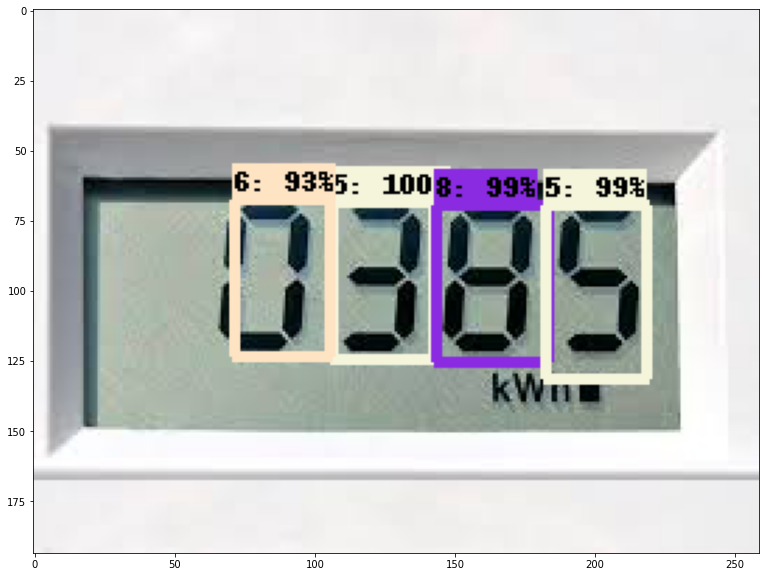

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/2.jpeg... Done


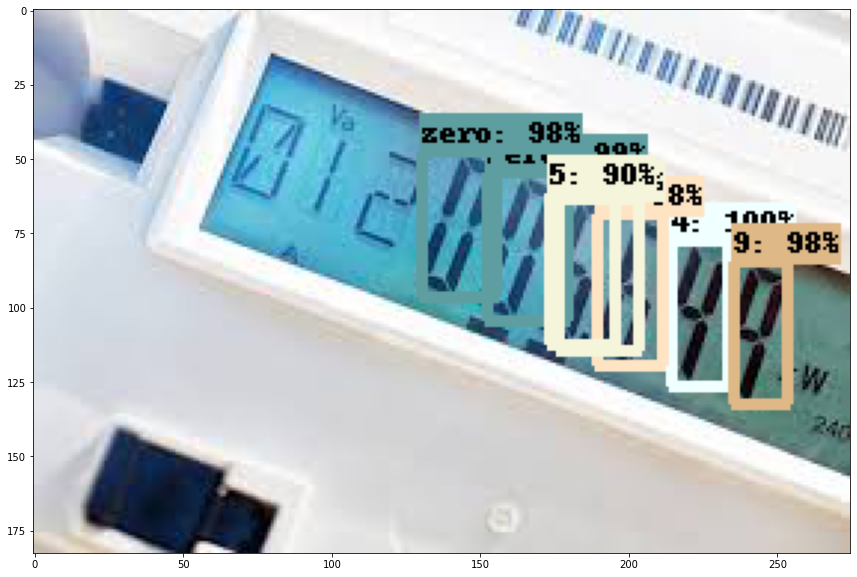

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/3.jpeg... Done


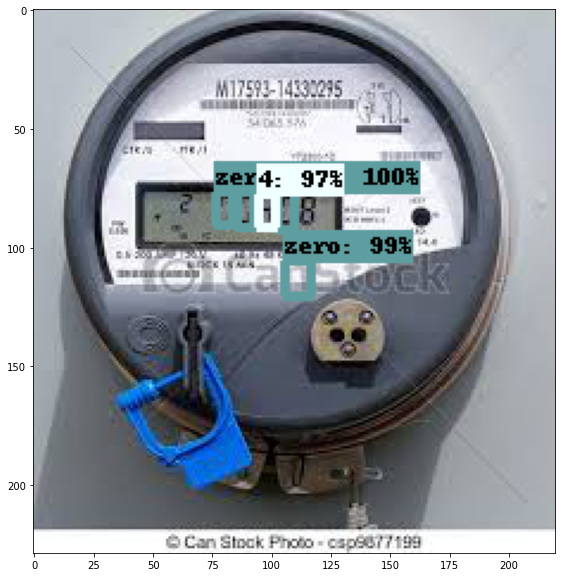

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/10.jpg... Done


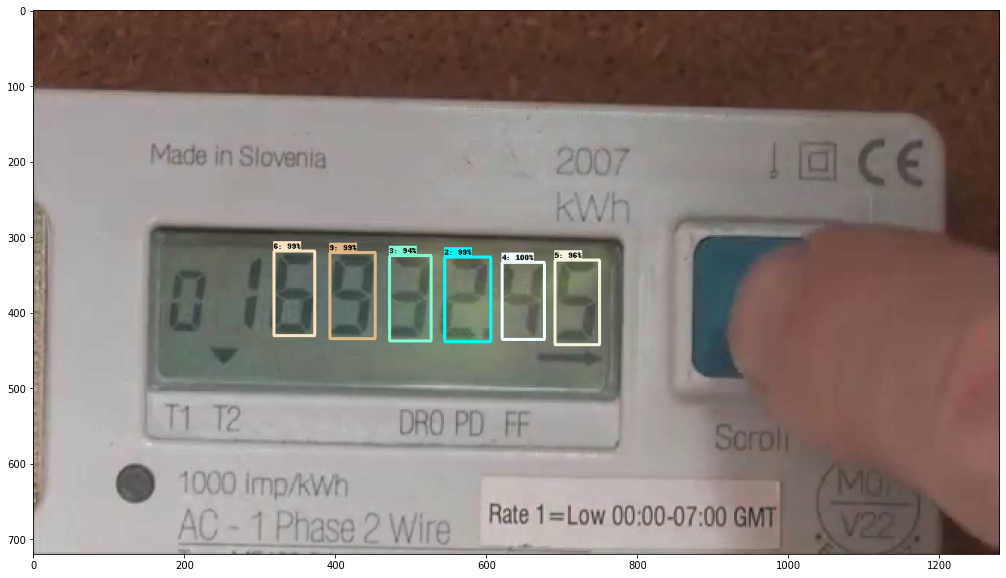

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/15.jpeg... Done


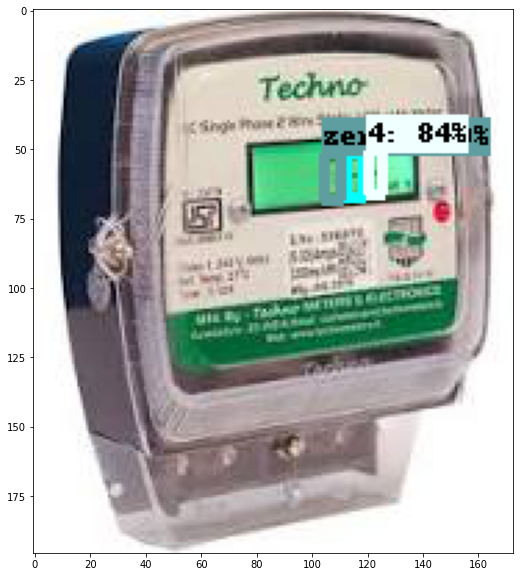

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/16.jpeg... Done


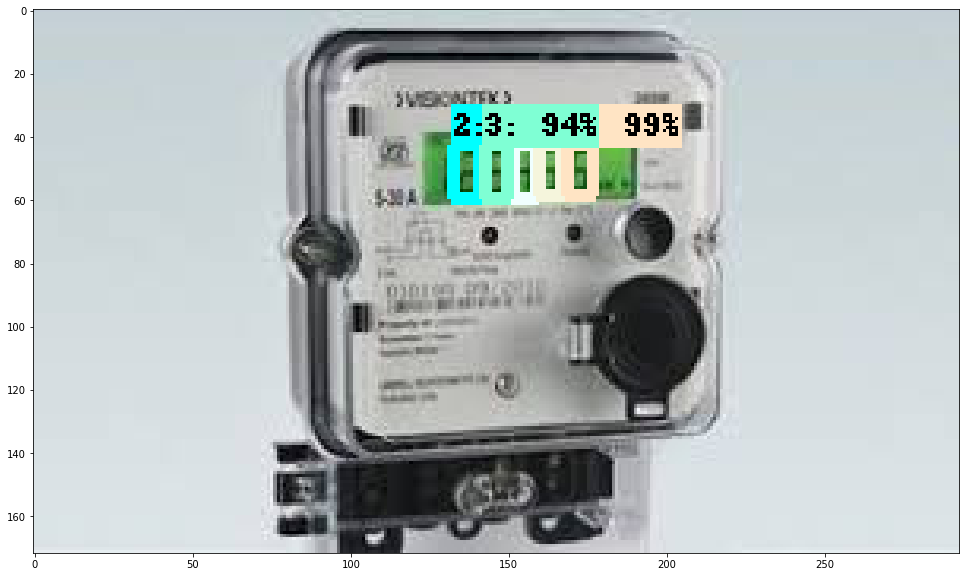

Running inference for /content/gdrive/MyDrive/TensorFlow/workspace/training_demo/19.jpeg... Done


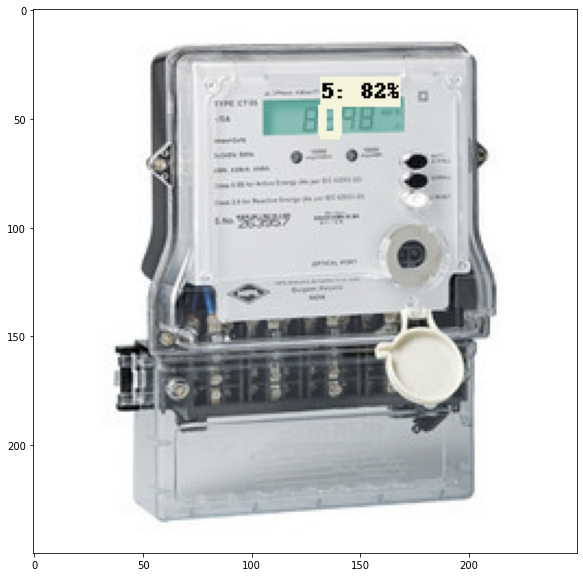

In [44]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))
for image_path in img:
    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)
    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]
    detections=detect_function(input_tensor)
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy() for key,value in detections.items()}
    detections['num_detections']=num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections=image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=100,     
            min_score_thresh=.8,      
            agnostic_mode=False)
    %matplotlib inline
    plt.figure(figsize=(20, 10))
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()  